# MODULE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy

In [3]:
pdbs    = ['3bbr', '6mg5',
           '5j8o', '5j89', '5fqd',
           '3m50', '3m51', '2o98', '6ygj', '6nv2',
           '4mdk', '1kkq',
           '5ad2', '5ad3', '5t35', '6sis', '6bn7', '6boy',  '6hay', '6hr2', '7jto', '7jtp']
#           0  1   2   3     4    5    6 
systems = ['L','A','B','AL','BL','AB','ALB']
N_wats = ['','_10wat', '_30wat','_50wat']
path_endpoint = './endpoint_methods/'
kb = 0.001985875 # kcal/mol
kb = 0.00831446261815324 # kJ/mol
T = 295.15 # K
beta =  1/(kb*T) 
runs    = 10
print(len(pdbs),beta)

22 0.40749569724792833


In [4]:
# read from origianl MMPBSA.py output
def read_pdb(pdb,systems=systems,runs=runs,frames=2000,skip=0,method='mmpbsa',cal2J=4.184):
    G_gas  = np.zeros([len(systems),runs,frames-skip])
    G_solv = np.zeros([len(systems),runs,frames-skip])
    for i_sys, sys in enumerate(systems):
        for i_run in range(runs):
            run = str(i_run + 1)
            filename = '../systems/simulations/'+method+'/' + pdb + '/run' + run + '/' + sys + '_output' + run + '.csv'
            df = pd.read_csv(filename,skiprows=1)
            G_gas[i_sys,i_run]  = df['G gas'].values[skip:]
            G_solv[i_sys,i_run] = df['G solv'].values[skip:]
    if cal2J:
        print('Converting from cal to J')
        G_gas = G_gas * cal2J
        G_solv = G_solv * cal2J
    return G_gas, G_solv

def read_pdb_Nwat(pdb,systems=systems,runs=runs,frames=2000,skip=0,method='mmpbsa',wat='',cal2J=4.184):
    wat=str(wat)
    G_gas  = np.zeros([len(systems),runs,frames-skip])
    G_solv = np.zeros([len(systems),runs,frames-skip])
    for i_sys, sys in enumerate(systems):
        for i_run in range(runs):
            run = str(i_run + 1)
            filename_imp = '../systems/simulations/'+method+'/' + pdb + '/run' + run + '/' + sys + '_output' + run + '.csv'
            df_imp = pd.read_csv(filename_imp,skiprows=1)
            if sys in ['A','AB','ALB','AL']:
                filename_wat = '../systems/simulations/'+method+wat+'/' + pdb + '/run' + run + '/' + sys + '_output' + run + '.csv'
                df_wat = pd.read_csv(filename_wat,skiprows=1)
                G_solv[i_sys,i_run] = df_wat['G solv'].values[skip:] +  df_wat['G gas'].values[skip:] - df_imp['G gas'].values[skip:]
            else:
                G_solv[i_sys,i_run] = df_imp['G solv'].values[skip:]
            G_gas[i_sys,i_run]  = df_imp['G gas'].values[skip:]
    if cal2J:
        print('Converting from cal to J')
        G_gas = G_gas * cal2J
        G_solv = G_solv * cal2J
    return G_gas, G_solv


In [5]:

def calc_ddG(G_gas,beta=beta):
    dAB = G_gas[5] - G_gas[1] - G_gas[2]
    dAL = G_gas[3] - G_gas[0] - G_gas[1]
    dLB = G_gas[4] - G_gas[0] - G_gas[2]

    return dAB, dAL, dLB
def calc_dG_solv(G_solv):
    dG = np.average(G_solv[6],axis=1) + \
    np.average(G_solv[0],axis=1)+ \
    np.average(G_solv[1],axis=1)+ \
    np.average(G_solv[2],axis=1)- \
    np.average(G_solv[3],axis=1)- \
    np.average(G_solv[4],axis=1)- \
    np.average(G_solv[5],axis=1)
    return dG
def calc_dG_AB(G_gas,G_solv):
    G = G_gas + G_solv
    dG =   np.average(G[5],axis=1) -  np.average(G[1],axis=1) -  np.average(G[2],axis=1)
    return dG

## Here is the code to transform the large data output from MMPBSA.py (> 6GB) to numpy arrays for the github readers
# without Nwat
pdb_alpha = ['6ygj','5t35','6sis','6bn7','6boy','7jto','7jtp' ,'6nv2']
nwat = N_wats[0]
methods = ['mmpbsa','mmgbsa']
for i_pdb,pdb in enumerate(pdbs):
    for i_method, method in enumerate(methods):
        G_gas, G_solv = read_pdb_Nwat(pdb,method=method,wat=nwat)
        output_gas  = path_endpoint + pdb + '_'+nwat+'_'+method+'_gas.npy'
        output_solv = path_endpoint + pdb + '_'+nwat+'_'+method+'_solv.npy'
        np.save(output_gas,G_gas)
        np.save(output_solv,G_solv)
# with Nwat
for i_nwat, nwat in enumerate(N_wats[1:]):
    for i_pdb,pdb in enumerate(pdb_alpha):
        for i_method, method in enumerate(methods):
            G_gas, G_solv = read_pdb_Nwat(pdb,method=method,wat=nwat)
            output_gas  = path_endpoint + pdb + '_'+nwat+'_'+method+'_gas.npy'
            output_solv = path_endpoint + pdb + '_'+nwat+'_'+method+'_solv.npy'
            np.save(output_gas,G_gas)
            np.save(output_solv,G_solv)
            

# Without Nwat

In [28]:
nwat = ''
method = 'mmpbsa'

/tmp/ipykernel_572449/660752772.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_induce = df_induce._append({'pdb':pdb,'dG':dG_AB[run]},ignore_index=True)
/tmp/ipykernel_572449/660752772.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_solv = df_solv._append({'pdb':pdb,'dG':dG_solv[run]},ignore_index=True)
/tmp/ipykernel_572449/660752772.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer

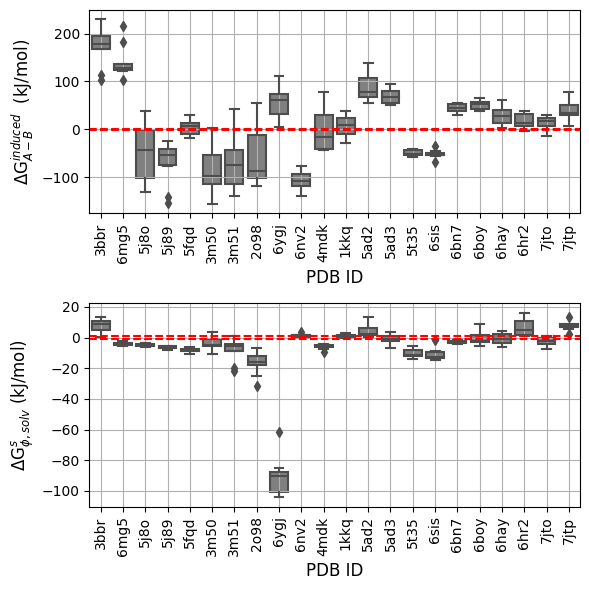

In [29]:
fig, axs = plt.subplots(2,1,figsize=(6,6))
titles = [r"$\Delta$G$^{induced}_{A-B}$ ",
         r"$\Delta$G$^s_{ \phi ,solv}$",
         r"$\Delta$G$^{induced}_{A-B} + \Delta$G$^s_{ \phi ,solv}$"]
color = []
runs = 10
avgs = []
stds = []
df_induce = pd.DataFrame(columns=['pdb','dG'])
df_solv = pd.DataFrame(columns=['pdb','dG'])
df_alpha = pd.DataFrame(columns=['pdb','dG'])
for i_pdb,pdb in enumerate(pdbs):
    path_gas =  path_endpoint + pdb + '_'+nwat+'_'+method+'_gas.npy'
    path_solv = path_endpoint + pdb + '_'+nwat+'_'+method+'_solv.npy'
    G_gas  = np.load(path_gas)
    G_solv = np.load(path_solv)
    dG_AB = calc_dG_AB(G_gas, G_solv)
    dG_solv = calc_dG_solv(G_solv)
    dG_alpha = dG_AB + dG_solv
    for run in range(runs):
        df_induce = df_induce._append({'pdb':pdb,'dG':dG_AB[run]},ignore_index=True)
        df_solv = df_solv._append({'pdb':pdb,'dG':dG_solv[run]},ignore_index=True)
        df_alpha = df_alpha._append({'pdb':pdb,'dG':dG_alpha[run]},ignore_index=True)

for i, df in enumerate([df_induce,df_solv]):
    sns.boxplot(data=df,x='pdb',y='dG',ax=axs[i],color='gray')
    # axs[i].set_title(titles[i])
    axs[i].plot([-0.5,len(pdbs)-0.5],[1,1],'--',color='red')
    axs[i].plot([-0.5,len(pdbs)-0.5],[-1,-1],'--',color='red')
    axs[i].set_xlim(-0.5,len(pdbs)-0.5)
    axs[i].set_xticks(np.arange(len(pdbs)))
    axs[i].set_xticklabels(pdbs,rotation=90)
    axs[i].grid()
    axs[i].set_ylabel(titles[i]+' (kJ/mol)',fontsize=12)
    axs[i].set_xlabel('PDB ID',fontsize=12)


plt.tight_layout()
filename = './Figures/dG_mmpbsa_box.svg'
plt.savefig(filename)

# Alpha  

In [8]:
pdb_alpha = ['6ygj','5t35','6sis','6bn7','6boy','7jto','7jtp' ,'6nv2']
alpha     = [14,     17.6,  20,   0.4,    0.6  ,  1.66 , 2.74 , 100  ]
dG_alpha = [-np.log(a)*1/beta for a in alpha]

y=-4.03+0.06 x
y=-3.01+0.07 x


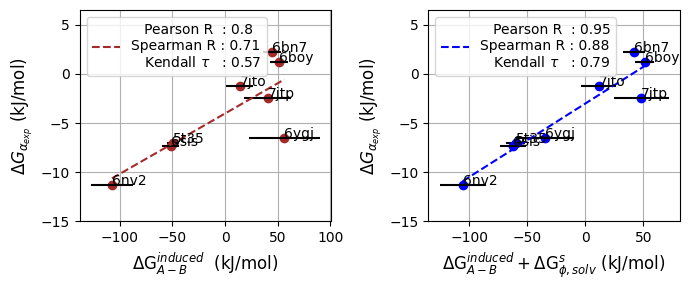

In [9]:
fig, axs = plt.subplots(1,2,figsize=(7,3))
colors = ['brown','blue']
titles = [r"$\rm \Delta$G$^{induced}_{A-B}$ ",
          r"$\rm \Delta$G$^{induced}_{A-B} + \Delta$G$^s_{\phi ,solv}$"]


xlabel = '$\Delta$G (kcal/mol)'
mmpbsa_r2 = np.zeros([2,len(N_wats),3]) # [n_method, nwat, r]
nwat=  N_wats[0]
method = 'mmpbsa'
ax = axs
G_s = np.zeros([len(pdb_alpha),2])
for i_pdb,pdb in enumerate(pdb_alpha):
    path_gas =  path_endpoint + pdb + '_'+nwat+'_'+method+'_gas.npy'
    path_solv = path_endpoint + pdb + '_'+nwat+'_'+method+'_solv.npy'
    G_gas  = np.load(path_gas)
    G_solv = np.load(path_solv)    
    dG_AB = calc_dG_AB(G_gas, G_solv)
    dG_solv = calc_dG_solv(G_solv)
    dG_tot = dG_AB + dG_solv

    for i_dG, dG in enumerate([dG_AB,dG_tot]):
        avg = np.average(dG)
        std = np.std(dG)
        G_s[i_pdb,i_dG] = avg
        if i_pdb ==0:
            ax[i_dG].plot(avg,dG_alpha[i_pdb],marker='o',color=colors[i_dG]) # ,label=titles[i_dG]
        else:
            ax[i_dG].plot(avg,dG_alpha[i_pdb],marker='o',color=colors[i_dG]) #,label=None
        ax[i_dG].errorbar(avg,dG_alpha[i_pdb],xerr=std,color='k')
        ax[i_dG].text(avg,dG_alpha[i_pdb],pdb)
# Fit 
for i_dG, G in enumerate(G_s.T):
    fit_line = np.polyfit(G,dG_alpha,1)
    fit_line = np.poly1d(fit_line)
    pr = round(scipy.stats.pearsonr(G,dG_alpha)[0],2)
    sr = round(scipy.stats.spearmanr(G,dG_alpha)[0],2)
    kt = round(scipy.stats.kendalltau(G,dG_alpha)[0],2)
    print('y='+str(round(fit_line[0],2))+'+'+str(round(fit_line[1],2))+' x')
    label = "   Pearson R  : "+str(pr)+"\nSpearman R : "+str(sr)+"\n"+r"   Kendall $\tau$   : "+str(kt)
    x = [np.min(G),np.max(G)]
    ax[i_dG].plot(x,fit_line(x),ls='--',color=colors[i_dG],label=label)
    ax[i_dG].legend()
    ax[i_dG].grid()
    # ax[i_dG].set_ylabel(r"-$\beta ^{-1} \rm ln( \alpha_{exp}$) (kcal/mol)")
    ax[i_dG].set_ylabel(r"$ \Delta G_{\alpha_{exp}}$ (kJ/mol)",fontsize=12)
    ax[i_dG].set_xlabel(titles[i_dG]+' (kJ/mol)',fontsize=12)
    ax[i_dG].set_ylim(-15,6.5)
    # ax[i_dG].set_title(titles[i_dG])
plt.tight_layout()
filename = './Figures/Alpha_correlation_mmpbsa_nwat=0.svg'
plt.savefig(filename)


# with Nwat

In [16]:
titles = ['Nwat=0','Nwat=10','Nwat=30','Nwat=50']
xlabels = [r'$\Delta$G$^{induced}_{A-B}$ (kJ/mol) ',
          r"$\Delta$G$^{induced}_{A-B} + \Delta$G$^s_{\phi, solv}$ (kJ/mol)"]

## mmpbsa

In [17]:
method = 'mmpbsa'

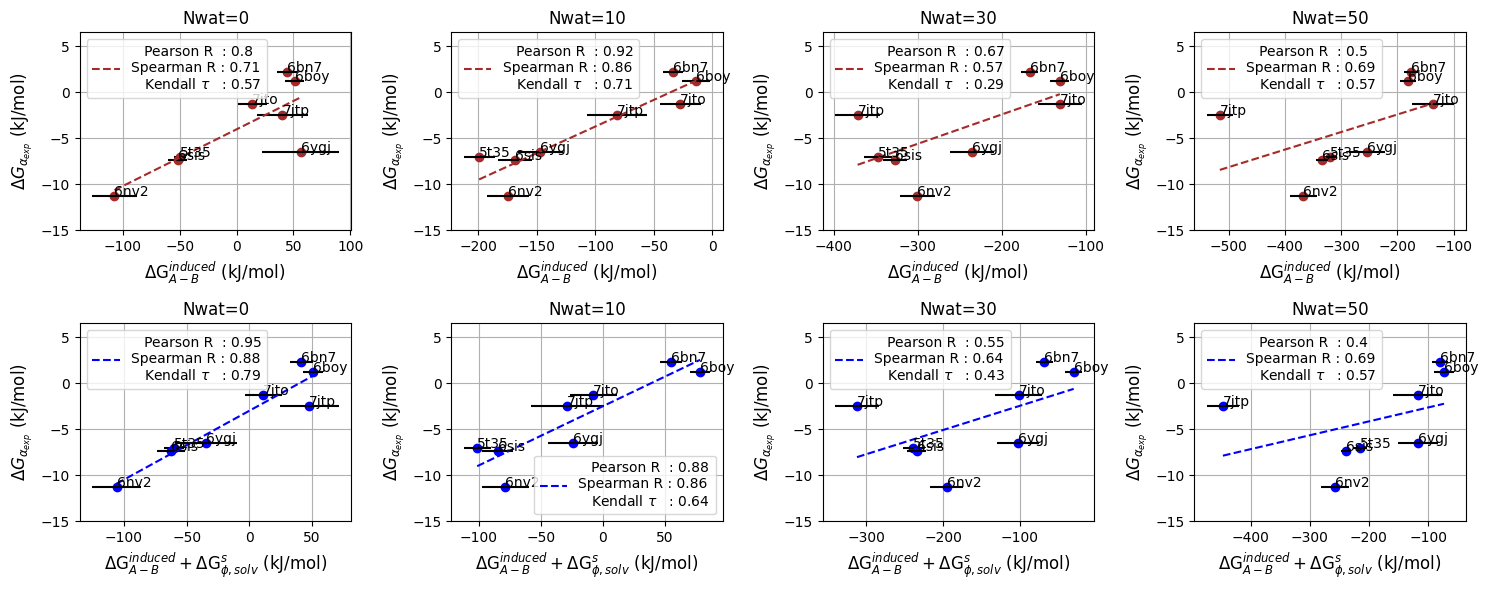

In [18]:
fig, axs = plt.subplots(2,4,figsize=(15,6))
colors = ['brown','blue']
mmpbsa_r2 = np.zeros([2,len(N_wats),3]) # [n_method, nwat, r]
for i_nwat, nwat in enumerate(N_wats):
    G_s = np.zeros([len(pdb_alpha),2])
    ax = axs[:,i_nwat]
    for i_pdb,pdb in enumerate(pdb_alpha):
        path_gas =  path_endpoint + pdb + '_'+nwat+'_'+method+'_gas.npy'
        path_solv = path_endpoint + pdb + '_'+nwat+'_'+method+'_solv.npy'
        G_gas  = np.load(path_gas)
        G_solv = np.load(path_solv)        
        dG_AB = calc_dG_AB(G_gas, G_solv)
        dG_solv = calc_dG_solv(G_solv)
        dG_tot = dG_AB + dG_solv
        
        for i_dG, dG in enumerate([dG_AB,dG_tot]):
            avg = np.average(dG)
            std = np.std(dG)
            G_s[i_pdb,i_dG] = avg
            if i_pdb ==0:
                ax[i_dG].plot(avg,dG_alpha[i_pdb],marker='o',color=colors[i_dG]) # ,label=titles[i_dG]
            else:
                ax[i_dG].plot(avg,dG_alpha[i_pdb],marker='o',color=colors[i_dG]) #,label=None
            ax[i_dG].errorbar(avg,dG_alpha[i_pdb],xerr=std,color='k')
            ax[i_dG].text(avg,dG_alpha[i_pdb],pdb)
    # Fit 
    for i_dG, G in enumerate(G_s.T):
        fit_line = np.polyfit(G,dG_alpha,1)
        fit_line = np.poly1d(fit_line)
        pr = round(scipy.stats.pearsonr(G,dG_alpha)[0],2)
        sr = round(scipy.stats.spearmanr(G,dG_alpha)[0],2)
        kt = round(scipy.stats.kendalltau(G,dG_alpha)[0],2)
        mmpbsa_r2[i_dG,i_nwat] = pr,sr,kt

        label = "   Pearson R  : "+str(pr)+"\nSpearman R : "+str(sr)+"\n"+r"   Kendall $\tau$   : "+str(kt)
        x = [np.min(G),np.max(G)]
        ax[i_dG].plot(x,fit_line(x),ls='--',color=colors[i_dG],label=label)
        ax[i_dG].legend()
        ax[i_dG].grid()
        ax[i_dG].set_ylabel(r"$ \Delta G_{\alpha_{exp}}$ (kJ/mol)",fontsize=12)
        ax[i_dG].set_xlabel(xlabels[i_dG],fontsize=12)
        ax[i_dG].set_ylim(-15,6.5)
        ax[i_dG].set_title(titles[i_nwat])
plt.tight_layout()
filename = './Figures/Alpha_correlation_mmpbsa.svg'
plt.savefig(filename)


## MMGBSA

In [13]:
method = 'mmgbsa'

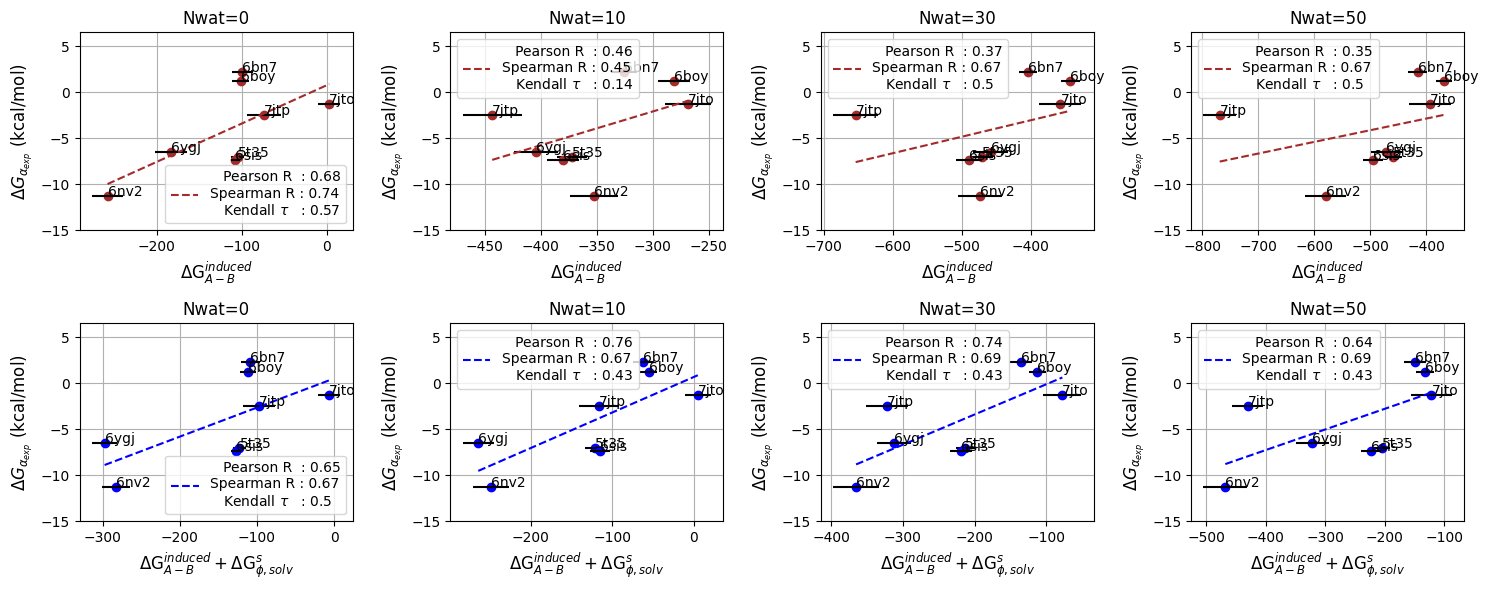

In [14]:
fig, axs = plt.subplots(2,4,figsize=(15,6))
colors = ['brown','blue']
mmgbsa_r2 = np.zeros([2,len(N_wats),3]) # [n_method, nwat, r]
for i_nwat, nwat in enumerate(N_wats):
    G_s = np.zeros([len(pdb_alpha),2])
    ax = axs[:,i_nwat]
    for i_pdb,pdb in enumerate(pdb_alpha):
        path_gas =  path_endpoint + pdb + '_'+nwat+'_'+method+'_gas.npy'
        path_solv = path_endpoint + pdb + '_'+nwat+'_'+method+'_solv.npy'
        G_gas  = np.load(path_gas)
        G_solv = np.load(path_solv)        
        dG_AB = calc_dG_AB(G_gas, G_solv)
        dG_solv = calc_dG_solv(G_solv)
        dG_tot = dG_AB + dG_solv
        
        for i_dG, dG in enumerate([dG_AB,dG_tot]):
            avg = np.average(dG)
            std = np.std(dG)
            G_s[i_pdb,i_dG] = avg
            if i_pdb ==0:
                ax[i_dG].plot(avg,dG_alpha[i_pdb],marker='o',color=colors[i_dG]) # ,label=titles[i_dG]
            else:
                ax[i_dG].plot(avg,dG_alpha[i_pdb],marker='o',color=colors[i_dG]) #,label=None
            ax[i_dG].errorbar(avg,dG_alpha[i_pdb],xerr=std,color='k')
            ax[i_dG].text(avg,dG_alpha[i_pdb],pdb)
    # Fit 
    for i_dG, G in enumerate(G_s.T):
        fit_line = np.polyfit(G,dG_alpha,1)
        fit_line = np.poly1d(fit_line)
        pr = round(scipy.stats.pearsonr(G,dG_alpha)[0],2)
        sr = round(scipy.stats.spearmanr(G,dG_alpha)[0],2)
        kt = round(scipy.stats.kendalltau(G,dG_alpha)[0],2)
        mmgbsa_r2[i_dG,i_nwat] = pr,sr,kt

        label = "   Pearson R  : "+str(pr)+"\nSpearman R : "+str(sr)+"\n"+r"   Kendall $\tau$   : "+str(kt)
        x = [np.min(G),np.max(G)]
        ax[i_dG].plot(x,fit_line(x),ls='--',color=colors[i_dG],label=label)
        ax[i_dG].legend()
        ax[i_dG].grid()
        ax[i_dG].set_ylabel(r"$ \Delta G_{\alpha_{exp}}$ (kJ/mol)",fontsize=12)
        ax[i_dG].set_xlabel(xlabels[i_dG],fontsize=12)
        ax[i_dG].set_ylim(-15,6.5)
        ax[i_dG].set_title(titles[i_nwat])
plt.tight_layout()
filename = './Figures/Alpha_correlation_mmgbsa.svg'
plt.savefig(filename)


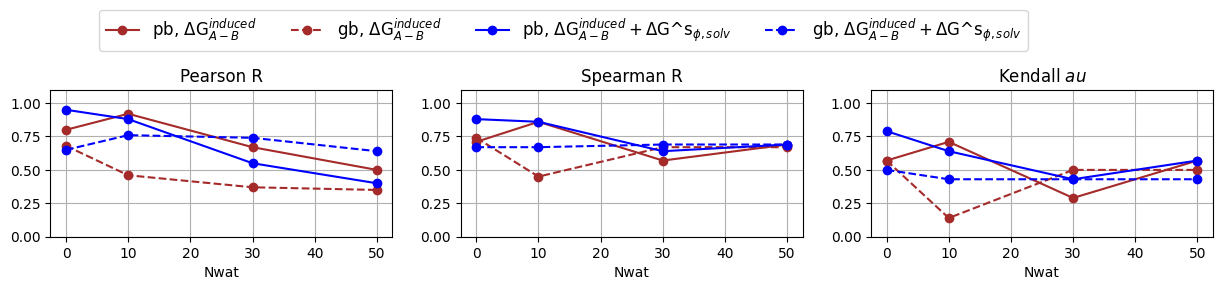

In [15]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
colors = ['brown','blue']
labels = [r'$\Delta$G$^{induced}_{A-B}$ ',
          '$\Delta$G$^{induced}_{A-B} + \Delta$G^s$_{\phi, solv}$',
         r'$\Delta$G$_{tot}$']

titles = ["Pearson R","Spearman R","Kendall $\tau$"]
x = [0,10,30,50]
for i_r2 in range(3):    # pearson , spearman, kendall
    for i_G in range(2): # G induced, G induced + G_solv3
        axs[i_r2].plot(x, mmpbsa_r2[i_G,:,i_r2], ls='-',color=colors[i_G],label='pb, '+labels[i_G],marker='o')
        axs[i_r2].plot(x, mmgbsa_r2[i_G,:,i_r2], ls='--',color=colors[i_G],label='gb, '+labels[i_G],marker='o')
    
    axs[i_r2].set_title(titles[i_r2])
    axs[i_r2].set_xlabel('Nwat')
    axs[i_r2].set_ylim(0,1.1)
    axs[i_r2].grid()
    
fig.subplots_adjust(top=0.6)
axs[1].legend(fontsize=12,ncol=4, bbox_to_anchor=(0.3, 1.6),loc='upper center')
filename = './Figures/Alpha_pb_gb_comparison.svg'
plt.savefig(filename)